# Anthony Botello
## Lab 2, PHYS 434 AD

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import scipy
from scipy import stats, special
from scipy.signal import fftconvolve

plt.rcParams['figure.figsize'] = (10,8)


# Problem 1

## A)

We are given a Poisson-distributed cosmic-ray background with an average of $\mu$ events per day. If we want to sample data over an interval of $n$ days, then we can't simply use the probability distribution of the background over one day to determine the statistical significance of any results because each day constitutes an independent measurement. Instead, we need to compute a new probability distribution for the background over $n$ days by summing the one-day distribution with itself $n$ times. This is accomplished by convolving it with itself $n$ times.

Below we can see the probability distribution of the background over 1-4 days. As we sum over more days, the distribution appears to be getting narrower and more Gaussian.

In [2]:
mu = np.random.random()*9.5 + 0.5
Y = np.random.random()*(10-mu) + mu
bg = stats.poisson(mu)
x = np.arange(bg.ppf(0.0001),bg.ppf(0.9999))

In [3]:
def sum_bg(num_days,base):
    base = base/np.sum(base)
    conv = base
    for i in range(1,num_days):
        conv = fftconvolve(base,conv)
    return conv

def weighted_avg_var(values, weights):
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    return average, variance

In [5]:
def plot_sum(days):
    dist = sum_bg(days,bg.pmf(x))
    ex = np.arange(x[0],len(dist))
    avg,var = weighted_avg_var(ex,dist)
    
    fig,ax = plt.subplots(1,2, figsize=(20,10))
    fig.suptitle(f'Sum of Cosmic Ray Background',fontsize=24)
    
    ax[0].step(ex,dist,label='Poisson')
    ax[0].plot(np.linspace(x[0],len(dist)),stats.norm(loc=mu*days,scale=np.sqrt(mu*days)).pdf(np.linspace(x[0],len(dist))),label='Gaussian')
    ax[0].set_xlabel("# of Events",fontsize=16)
    ax[0].set_ylabel("Probability Mass",fontsize=16)
    ax[0].set_title(f'Days = {days}, $\mu$ = {np.round(avg,decimals=2)}',fontsize=16)
    ax[0].legend(fontsize=20)

    ax[1].step(ex,np.log(dist),label='Poisson')
    ax[1].plot(np.linspace(x[0],len(dist)),stats.norm(loc=mu*days,scale=np.sqrt(mu*days)).logpdf(np.linspace(x[0],len(dist))),label='Gaussian')
    ax[1].set_xlabel("# of Events",fontsize=16)
    ax[1].set_ylabel("Log of Probability Mass",fontsize=16)
    ax[1].set_title(f'Days = {days}, $\mu$ = {np.round(avg,decimals=2)}',fontsize=16)
    ax[1].legend(fontsize=20)
    plt.show()

interact(plot_sum,days=widgets.IntSlider(min=1,max=10,step=1,value=1))

interactive(children=(IntSlider(value=1, description='days', max=10, min=1), Output()), _dom_classes=('widget-…

<function __main__.plot_sum(days)>

# B)

We can see below that the probability distribution for the sum of the background after 5 days closely resembles a Gaussian with $\mu_N = \sigma^2_N = 5\mu$. However, since the distribution has approximately the same $\mu$ and $\sigma^2$ (the error is due to the numerical approximation of the convolution function), it is by definition a Poisson distribution. This is because the data sets of each day are independent, and the sum of Poisson distributions of independent random variables is another Poisson distribution ([https://en.wikipedia.org/wiki/List_of_convolutions_of_probability_distributions]): $$\sum_{i=1}^nPoisson(X_i) = Poisson\left(\sum_{i=1}^nX_i\right).$$ In our case, the variables are all the same, and so we have $$\sum_{i=1}^nPoisson(X;\mu) = Poisson\left(X;n\mu\right)$$ with the $\mu_{sum} = n\mu$. Conceptually, this makes sense because, day to day, there is no change in the distribution of the data we're collecting. We're simply collecting more of it.

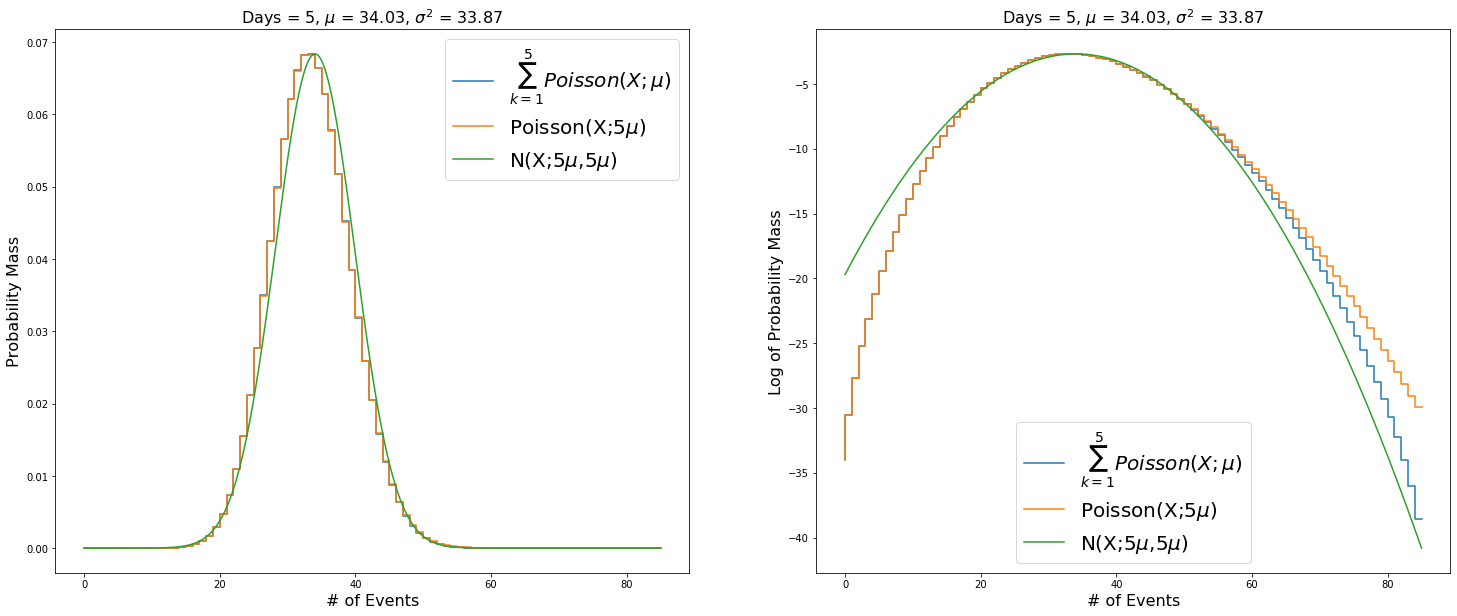

In [6]:
dist = sum_bg(5,bg.pmf(x))
ex=np.arange(x[0],len(dist))

avg,var = weighted_avg_var(ex,dist)

fig,ax = plt.subplots(1,2,figsize=(25,10))
ax[0].step(ex,dist,label="$\sum_{k=1}^5Poisson(X;\mu)$")
ax[0].step(ex,stats.poisson.pmf(ex,5*mu),label='Poisson(X;5$\mu$)')
ax[0].plot(np.linspace(ex[0],ex[-1],1000),stats.norm(loc=5*mu,scale=np.sqrt(5*mu)).pdf(np.linspace(ex[0],ex[-1],1000)),label='N(X;5$\mu$,5$\mu$)')
ax[0].set_xlabel("# of Events",fontsize=16)
ax[0].set_ylabel("Probability Mass",fontsize=16)
ax[0].set_title(f'Days = {5}, $\mu$ = {np.round(avg,decimals=2)}, $\sigma^2$ = {np.round(var,decimals=2)}',fontsize=16)
ax[0].legend(fontsize=20)

ax[1].step(ex,np.log(dist),label="$\sum_{k=1}^5Poisson(X;\mu)$")
ax[1].step(ex,np.log(stats.poisson.pmf(ex,5*mu)),label='Poisson(X;5$\mu$)')
ax[1].plot(np.linspace(ex[0],ex[-1],1000),stats.norm(loc=5*mu,scale=np.sqrt(5*mu)).logpdf(np.linspace(ex[0],ex[-1],1000)),label='N(X;5$\mu$,5$\mu$)')
ax[1].set_xlabel("# of Events",fontsize=16)
ax[1].set_ylabel("Log of Probability Mass",fontsize=16)
ax[1].set_title(f'Days = {5}, $\mu$ = {np.round(avg,decimals=2)}, $\sigma^2$ = {np.round(var,decimals=2)}',fontsize=16)
ax[1].legend(fontsize=20)
plt.show()

## C)

The average distribution of the background is the sum with the x-axis divided by the number of days. Since we're averaging the background distribution over $n$ days, we have to divide the x-axis by $n$. So, while the mean doesn't change ($\mu_{avg}=\mu$), the variance gets scaled by a factor of $1/n$ ($\sigma^2_{avg}=\frac{\sigma^2}{n}$). Therefore, the average of the background distribution is no longer a Poisson distribution since $\mu_{avg} \neq \sigma_{avg}^2$.

Despite the distribution no longer being a Poisson, we can see below that it still converges to a Gaussian distribution as it's averaged over more days, in accordance with the central limit theorem. It doesn't appear to be converging any faster or slower than the sum of the background.

In [8]:
def plot_avg(days):
    dist = sum_bg(days,bg.pmf(x))
    ex = np.arange(x[0],len(dist))/days
    avg,var = weighted_avg_var(ex,dist)
    gauss_x = np.linspace(ex[0],ex[-1],1000)
    gauss = stats.norm(loc=avg,scale=np.sqrt(var))
    
    fig,ax = plt.subplots(1,2,figsize=(25,10))
    ax[0].step(ex,dist,label=f'Avg. Background')
    ax[0].plot(gauss_x,gauss.pdf(gauss_x)/days,label='N($\mu$,$\sigma^2$)')
    ax[0].legend(fontsize=16)
    ax[0].set_xlabel("Avg. # of Events",fontsize=16)
    ax[0].set_ylabel("Probability Mass",fontsize=16)
    ax[0].set_title(f'Days = {days}, $\mu$={np.round(avg,decimals=3)}, $\sigma^2$={np.round(var,decimals=3)}',fontsize=24)

    ax[1].step(ex,np.log(dist),label=f'Avg. Background')
    ax[1].plot(gauss_x,np.log(gauss.pdf(gauss_x)/days),label='N($\mu$,$\sigma^2$)')
    ax[1].legend(fontsize=16)
    ax[1].set_xlabel("Avg. # of Events",fontsize=16)
    ax[1].set_ylabel("Log of Probability Mass",fontsize=16)
    ax[1].set_title(f'Days = {days}, $\mu$={np.round(avg,decimals=3)}, $\sigma^2$={np.round(var,decimals=3)}',fontsize=24)
    plt.show()

interact(plot_avg,days=widgets.IntSlider(min=2,max=50,step=1,value=2))

interactive(children=(IntSlider(value=2, description='days', max=50, min=2), Output()), _dom_classes=('widget-…

<function __main__.plot_avg(days)>

## D)

Suppose we observed $YN$ gamma rays over a period of $N$ days. To calculate the significance of this observation we first need to sum the background over $N$ days to get the probability distribution of the background over that interval. Since the distribution of the background is $Poisson(X;\mu)$, we can use the distribution $Poisson(X;N\mu)$ as the sum of our background. To calculate the $p-value$ of the observation, we sum $$\sum_{i=YN}^\infty Poisson(x_i;N\mu)$$ (this is accomplished using the Poisson's survival function $poisson(mu).sf(YN)$). Once we have the $p-value$, we can calculate the appropriate $X\sigma$ on a standard Gaussian distribution by using its inverse survival function ($norm.isf(p-value)$).

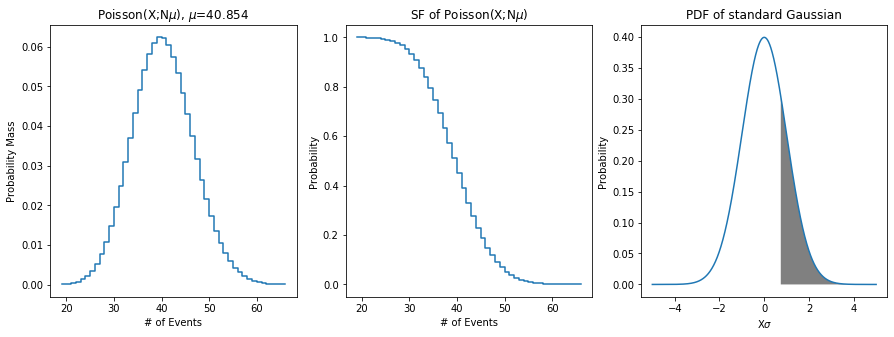

In [9]:
N = np.random.randint(1,int(Y))

num_events = int(N*Y)
dist = stats.poisson(N*mu)

probability = dist.sf(num_events)
sigma = stats.norm.isf(probability)

fig,ax = plt.subplots(1,3,figsize=(15,5))
ex=np.arange(dist.ppf(0.0001),dist.ppf(0.9999))

ax[0].step(ex,dist.pmf(ex))
ax[0].set_xlabel('# of Events')
ax[0].set_ylabel('Probability Mass')
ax[0].set_title(f'Poisson(X;N$\mu$), $\mu$={np.round(N*mu,decimals=3)}')

ax[1].step(ex,dist.sf(ex))
ax[1].set_xlabel('# of Events')
ax[1].set_ylabel('Probability')
ax[1].set_title('SF of Poisson(X;N$\mu$)')

ax[2].plot(np.linspace(-5,5,1000),stats.norm.pdf(np.linspace(-5,5,1000)))
ax[2].fill_between(np.linspace(sigma,5,1000),0,stats.norm.pdf(np.linspace(sigma,5,1000)),facecolor='gray')
ax[2].set_ylabel('Probability')
ax[2].set_xlabel('X$\sigma$')
ax[2].set_title('PDF of standard Gaussian')

plt.show()

In [10]:
print(f'The probability of observing {num_events} gamma rays over {N} days is {np.round(probability,decimals=5)}. The significance of this observation is {np.round(sigma,decimals=5)}-sigma.')

The probability of observing 45 gamma rays over 6 days is 0.22982. The significance of this observation is 0.73945-sigma.


# Problem 2

## A)

We have chosen the $\chi^2(r)$ distribution, where $r$ is the number of degrees of freedom. $\chi^2(r)$ which has the properties $\mu = r$, $\sigma^2=2r$, and $$\sum_i^n\chi^2(r_i) = \chi^2\left(\sum_i^nr_i\right).$$ Therefore, when all $r_i$ are the same, the average over an interval of $n$ is $$\sum_i^n\chi^2(r) = \chi^2\left(nr\right).$$ In this case, we have set $r = 5$. Below, we can see how the shape of the distribution changes as we change the interval we're averaging over.

In [11]:
def plot_avg_chi2(num_times):
    r=num_times*5
    dist = stats.chi2(r)
    x = np.linspace(dist.ppf(0.0000001),dist.ppf(0.9999999),1000)
    
    fig, ax = plt.subplots(1,2,figsize=(20,10))
    fig.suptitle(f'Interval = {num_times}',size=15)
    
    ax[0].plot(x/num_times,dist.pdf(x))
    ax[0].set_xlabel('# of Events',fontsize=16)
    ax[0].set_ylabel('Probability Density',fontsize=16)
    
    ax[1].plot(x/num_times,dist.logpdf(x))
    ax[1].set_xlabel('# of Events',fontsize=16)
    ax[1].set_ylabel('Log of Probability Density',fontsize=16)
    plt.show()

In [12]:
interact(plot_avg_chi2,num_times=widgets.IntSlider(min=1,max=100,step=1,value=1))

interactive(children=(IntSlider(value=1, description='num_times', min=1), Output()), _dom_classes=('widget-int…

<function __main__.plot_avg_chi2(num_times)>

## B)

We can see above that the linear plot of the average distribution quickly starts to resemble a Gaussian distribution as the interval approaches 10. However, a better estimate would be to look at the logorithmic plot which takes about 50 intervals to appear Gaussian.

# Problem 3

## A)

The significance is calculated the same as in Problem 1.D.

In [13]:
dev = np.random.random()*2.0
mu = np.random.random()*5.0 + dev*3
bg = stats.norm(loc=mu,scale=dev)
x = np.linspace(mu - 5*dev,mu + 5*dev,10000)
Y = np.random.choice(np.linspace(mu + 2*dev,mu + 5*dev,10000))
p = bg.sf(Y)
sigma = stats.norm.isf(p)
print(f"signal = {np.round(Y,decimals=3)}, mean = {np.round(mu,decimals=3)}, variance = {np.round(np.power(dev,2),decimals=3)}")

signal = 8.754, mean = 6.406, variance = 0.225


In [14]:
print(f'The significance of detecting a signal of strength {np.round(Y,decimals=3)} is {np.round(sigma,decimals=3)}-sigma.')
if sigma > 5:
    print('Since this is greater than 5, we can claim discovery.')
else:
    print('Since this is not greater than 5, we can\'t claim discovery.')

The significance of detecting a signal of strength 8.754 is 4.953-sigma.
Since this is not greater than 5, we can't claim discovery.


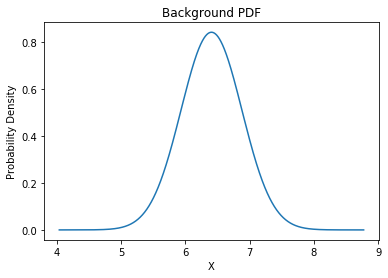

In [15]:
fig,ax = plt.subplots(1,1)

ax.plot(x,bg.pdf(x))
ax.set_xlabel('X')
ax.set_ylabel('Probability Density')
ax.set_title(f'Background PDF')

plt.show()

## B)

We're searching for a signal within an image consisting of 10,000 pixels. We know that the background distribution of 1 pixel is Gaussian, and we know the parameters of the distribution. If search over 10,000 pixels, what is the probability that a signal in one of them is the result of statistical chance? In other words, with what confidence can we claim that a signal in 1 out of 10,000 pixels is a legitimate discovery?

To get the background of the search we multiply the PDF of the background for 1 pixel by 10000.

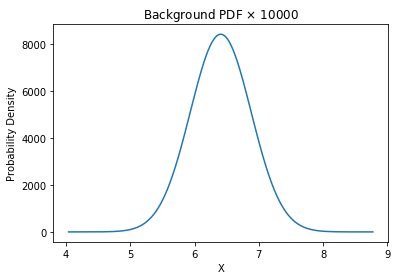

In [16]:
fig,ax = plt.subplots(1,1)

ax.plot(x,bg.pdf(x)*10000)
ax.set_xlabel('X')
ax.set_ylabel('Probability Density')
ax.set_title('Background PDF $\\times$ 10000')
plt.show()

## C)

In [17]:
p = bg.sf(Y)/10000
sigma = stats.norm.isf(p)

print(f'The significance of detecting a signal of strength {np.round(Y,decimals=3)} is {np.round(sigma,decimals=3)}-sigma.')
if sigma > 5:
    print('Since this is greater than 5, we can claim discovery.')
else:
    print('Since this is not greater than 5, we can\'t claim discovery.')

The significance of detecting a signal of strength 8.754 is 6.515-sigma.
Since this is greater than 5, we can claim discovery.


# Problem 4

## A)

Knowing the PDF of the background distribution, in order to calculate the significance of a signal $Y$ we first have to calculate the probability that the signal was caused by the background by calculating the survival probability $p$ of $Y$. Once we have $p$, we calculate $X\sigma$ by calculating the value of the inverse survival function of a standard normal distribution. In code: X = norm.isf(bg.sf(Y)). Then, to determine the signal necessary for a 5$\sigma$ detection, we do the inverse: bg.isf(norm.sf(5)) = Y.

In [18]:
signal_1 = bg.isf(stats.norm.sf(5))
print(f'Given the background in Version 1, the signal necessary for a 5-sigma detection is {np.round(signal_1,decimals=3)}.')

Given the background in Version 1, the signal necessary for a 5-sigma detection is 8.776.


## B)

In [19]:
signal_2 = bg.isf(stats.norm.sf(5)/10000)
print(f'Given the background in Version 2, the signal necessary for a 5-sigma detection is {np.round(signal_2,decimals=3)}.')

Given the background in Version 2, the signal necessary for a 5-sigma detection is 9.51.


## C)

In [20]:
print(f'The signal necessary for discovery in Version 2 is {np.round(signal_2/signal_1,decimals=3)} times brighter than the signal necessary in Version 1.')

The signal necessary for discovery in Version 2 is 1.084 times brighter than the signal necessary in Version 1.


The sensitivity penalty is low because the distribution is the same for each experiment. It has the same $\mu$ and $\sigma^2$. In both cases, the probability of detecting a 5$\sigma$ signal is in the region where the distribution is close to zero with a very small rate of change.

## D)

In [21]:
def change_tf(order):
    signal_1 = bg.isf(stats.norm.sf(5))
    signal_2 = bg.isf(stats.norm.sf(5)/np.power(10,order))
    ratio = signal_2/signal_1
    print(f'With a trials factor of 10e{order}, the signal necessary in Version 2 is {np.round(ratio,decimals=3)} times brighter than in Version 1.')

interact(change_tf,order=widgets.IntSlider(min=1,max=15,step=1,value=1))

interactive(children=(IntSlider(value=1, description='order', max=15, min=1), Output()), _dom_classes=('widget…

<function __main__.change_tf(order)>